<a href="https://colab.research.google.com/github/vaishali-98/Python-Diabetes-Prediction/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
from pandas_profiling import ProfileReport
from collections import Counter
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('diabetesdata.csv')

In [ ]:
df

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1.0,1.0,1.0,40.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,2,0,1.0,1.0,1.0,28.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,NaN
3,3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,253675,0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,NaN
253676,253676,2,1.0,1.0,1.0,18.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,NaN
253677,253677,0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,2.0,5.0,2.0
253678,253678,0,1.0,0.0,1.0,23.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,0.0,3.0,NaN,0.0,0.0,1.0,7.0,5.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f991e206550>,
      dtype=object)

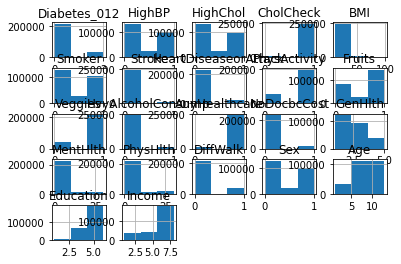

In [ ]:
df.hist(bins=3)

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,NaN
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,NaN
253676,2,1.0,1.0,1.0,18.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,NaN
253677,0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,2.0,5.0,2.0
253678,0,1.0,0.0,1.0,23.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,0.0,3.0,NaN,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
missing_col = ['HighBP']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()
missing_col = ['HighChol']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()
missing_col = ['CholCheck']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['BMI']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['Stroke']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()
missing_col = ['HeartDiseaseorAttack']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['Smoker']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['PhysActivity']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['Fruits']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['Veggies']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['HvyAlcoholConsump']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['NoDocbcCost']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['AnyHealthcare']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['GenHlth']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['MentHlth']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['PhysHlth']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['DiffWalk']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['Sex']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['Age']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['Education']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()

missing_col = ['Income']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mean()
df.head(10)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.000000,1.000000,1.000000,40.0,1.0,0.00000,0.094501,0.0,0.0,1.0,0.000000,1.0,0.0,5.000000,18.00000,15.000000,1.000000,0.000000,9.0,4.0,3.000000
1,0,0.000000,0.000000,0.000000,25.0,1.0,0.00000,0.000000,1.0,0.0,0.0,0.000000,0.0,1.0,3.000000,0.00000,0.000000,0.000000,0.000000,7.0,6.0,1.000000
2,0,1.000000,1.000000,1.000000,28.0,0.0,0.00000,0.094501,0.0,1.0,0.0,0.000000,1.0,1.0,5.000000,30.00000,30.000000,1.000000,0.000000,9.0,4.0,6.055197
3,0,1.000000,0.000000,1.000000,27.0,0.0,0.00000,0.000000,1.0,1.0,1.0,0.055919,1.0,0.0,2.000000,0.00000,0.000000,0.000000,0.000000,11.0,3.0,6.000000
4,0,1.000000,1.000000,1.000000,24.0,0.0,0.00000,0.000000,1.0,1.0,1.0,0.000000,1.0,0.0,2.000000,3.00000,0.000000,0.000000,0.000000,11.0,5.0,4.000000
5,0,1.000000,1.000000,1.000000,25.0,1.0,0.00000,0.000000,1.0,1.0,1.0,0.000000,1.0,0.0,2.000000,0.00000,2.000000,0.000000,0.440872,10.0,6.0,8.000000
6,0,1.000000,0.423937,1.000000,30.0,1.0,0.04058,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,3.000000,0.00000,4.239962,0.000000,0.000000,9.0,6.0,7.000000
7,0,0.429305,1.000000,1.000000,25.0,1.0,0.00000,0.000000,1.0,0.0,1.0,0.000000,1.0,0.0,3.000000,0.00000,0.000000,1.000000,0.000000,11.0,4.0,4.000000
8,2,0.429305,1.000000,1.000000,30.0,1.0,0.00000,1.000000,0.0,1.0,1.0,0.000000,1.0,0.0,2.511044,30.00000,30.000000,1.000000,0.000000,9.0,5.0,1.000000
9,0,0.000000,0.423937,0.962848,24.0,0.0,0.04058,0.000000,0.0,0.0,1.0,0.000000,1.0,0.0,2.000000,3.18187,0.000000,0.168363,1.000000,8.0,4.0,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f991f0b6ad0>]],
      dtype=object)

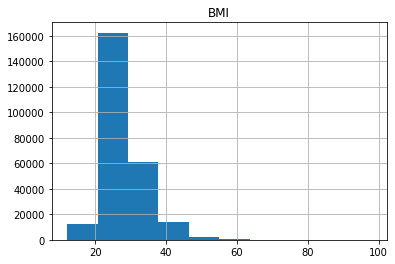

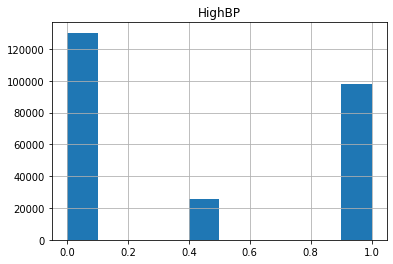

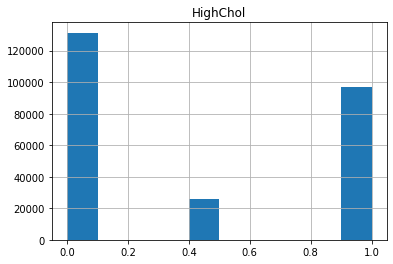

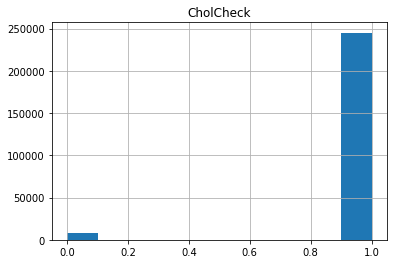

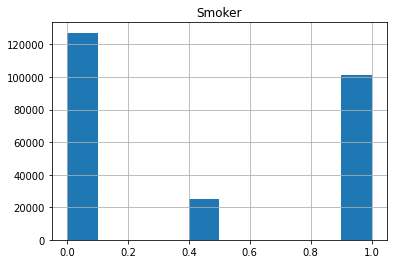

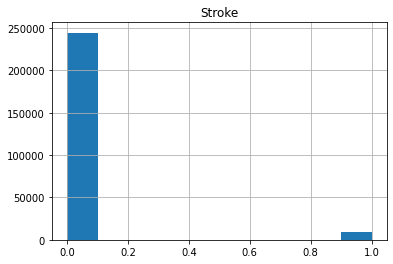

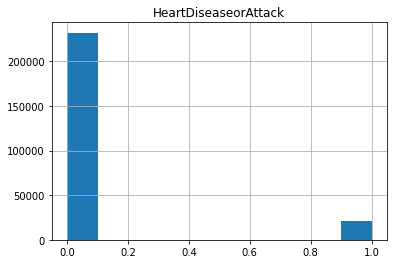

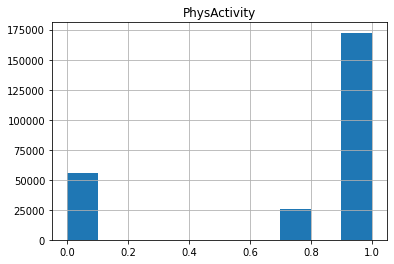

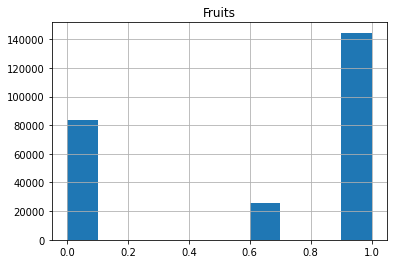

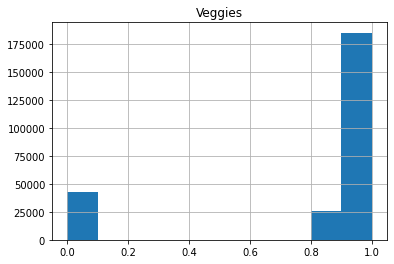

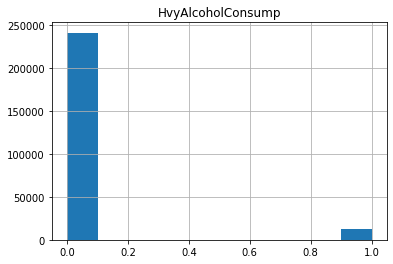

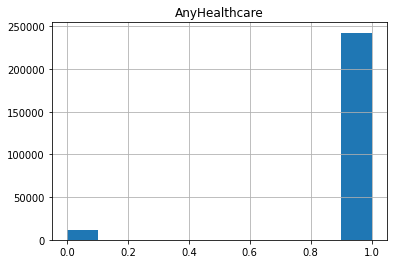

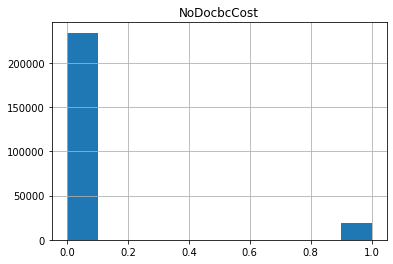

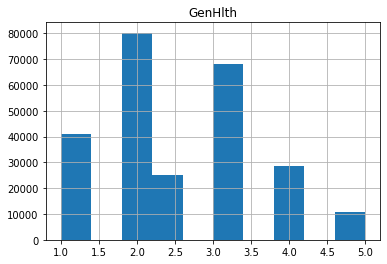

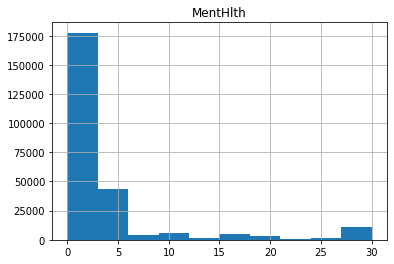

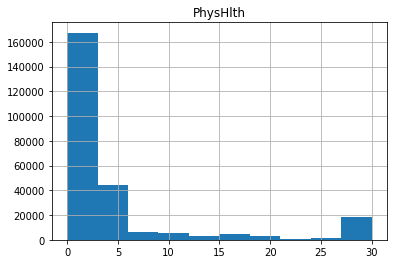

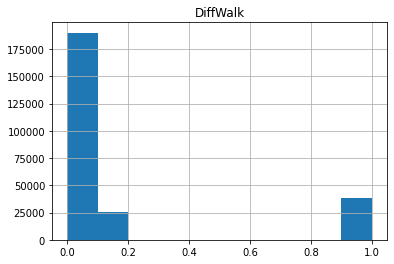

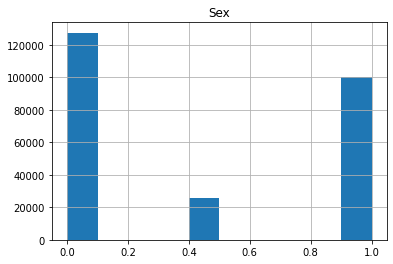

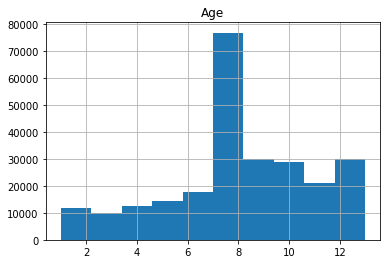

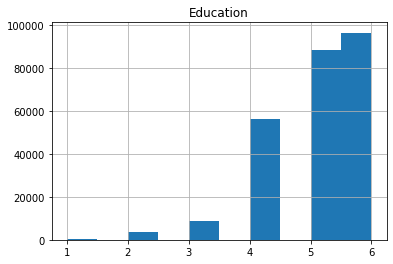

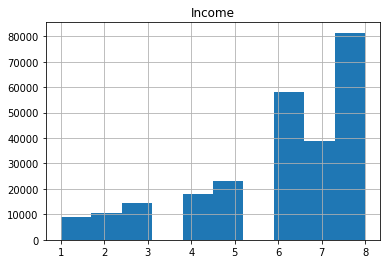

In [ ]:
df.hist(column="BMI")
df.hist(column="HighBP")
df.hist(column="HighChol")
df.hist(column="CholCheck")
df.hist(column="Smoker")
df.hist(column="Stroke")
df.hist(column="HeartDiseaseorAttack")
df.hist(column="PhysActivity")
df.hist(column="Fruits")
df.hist(column="Veggies")
df.hist(column="HvyAlcoholConsump")
df.hist(column="AnyHealthcare")
df.hist(column="NoDocbcCost")
df.hist(column="GenHlth")
df.hist(column="MentHlth")
df.hist(column="PhysHlth")
df.hist(column="DiffWalk")
df.hist(column="Sex")
df.hist(column="Age")
df.hist(column="Education")
df.hist(column="Income")

In [ ]:
#Data pre-processing
num_attribs = ['BMI', 'MentHlth', 'PhysHlth']

cat_attribs = list(df.columns[~df.columns.isin(['BMI', 'MentHlth', 'AnyHealthcare',
                                                'PhysHlth', 'Diabetes_012'])])

df[cat_attribs] = df[cat_attribs].astype('category')
df.Diabetes_012 = df.Diabetes_012.astype('int')



In [ ]:
#Normalize continuous variables
for num in num_attribs: 
    df[num] = (df[num] - df[num].min()) / (df[num].max() - df[num].min()) 


In [ ]:
label_map = {0:0, 1:1, 2:1}

df['Diabetes_012'] = df['Diabetes_012'].map(label_map)

In [ ]:
y = df.Diabetes_012
attribs = df[num_attribs + cat_attribs]
df = df.loc[:,~df.columns.duplicated()]
attribs = attribs.loc[:,~attribs.columns.duplicated()]
attribs = attribs.loc[:, ~attribs.columns.str.contains('^Unnamed')]
attribs

,BMI,MentHlth,PhysHlth,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
0,0.325581,0.600000,0.500000,1.0,1.0,1.0,1.0,0.00000,0.094501,0.0,0.000000,1.0,0.000000,0.0,5.0,1.000000,0.0,9.0,4.000000,3.000000
1,0.151163,0.000000,0.000000,0.0,0.0,0.0,1.0,0.00000,0.000000,1.0,0.000000,0.0,0.000000,1.0,3.0,0.000000,0.0,7.0,6.000000,1.000000
2,0.186047,1.000000,1.000000,1.0,1.0,1.0,0.0,0.00000,0.094501,0.0,1.000000,0.0,0.000000,1.0,5.0,1.000000,0.0,9.0,4.000000,6.055197
3,0.174419,0.000000,0.000000,1.0,0.0,1.0,0.0,0.00000,0.000000,1.0,1.000000,1.0,0.055919,0.0,2.0,0.000000,0.0,11.0,3.000000,6.000000
4,0.139535,0.100000,0.000000,1.0,1.0,1.0,0.0,0.00000,0.000000,1.0,1.000000,1.0,0.000000,0.0,2.0,0.000000,0.0,11.0,5.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.383721,0.000000,0.166667,1.0,1.0,1.0,0.0,0.00000,0.000000,0.0,1.000000,1.0,0.000000,0.0,3.0,0.000000,1.0,5.0,6.000000,6.055197
253676,0.069767,0.000000,0.000000,1.0,1.0,1.0,0.0,0.04058,0.000000,0.0,0.000000,0.0,0.000000,0.0,4.0,1.000000,0.0,11.0,2.000000,6.055197
253677,0.186047,0.106062,0.000000,0.0,0.0,1.0,0.0,0.00000,0.000000,1.0,1.000000,0.0,0.000000,0.0,1.0,0.000000,0.0,2.0,5.000000,2.000000
253678,0.127907,0.106062,0.000000,1.0,0.0,1.0,0.0,0.00000,0.094501,0.0,1.000000,1.0,0.000000,0.0,3.0,0.000000,1.0,7.0,5.000000,1.000000


In [ ]:
X = pd.get_dummies(attribs, columns=["BMI","MentHlth","PhysHlth","HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","NoDocbcCost","GenHlth","DiffWalk","Sex","Age","Education","Income"],drop_first=True)

In [ ]:
#Data Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=33)

eval_set = [(X_val, y_val)]

# summarize the class distribution of the training dataset
counter = Counter(y_train)
print(counter)

Counter({0: 170962, 1: 31982})


In [ ]:
# transform the training dataset

oversample = SMOTE(random_state = 0) 
X_train, y_train = oversample.fit_resample(X_train.values, y_train.ravel())


# summarize the new class distribution of the training dataset
counter = Counter(y_train)
print(counter)

Counter({0: 170962, 1: 170962})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_prediction=rf.predict(X_val)
print(y_train)
from sklearn import metrics
rf_matrix = metrics.confusion_matrix(y_val, y_prediction)
rf_matrix

[0 0 0 ... 1 1 1]


array([[41721,  1020],
       [ 6817,  1178]])

In [ ]:
print(classification_report(y_val, rf.predict(X_val), target_names=['no_diabetes', 'prediabetes_or_diabetes']))

                         precision    recall  f1-score   support

            no_diabetes       0.86      0.98      0.91     42741
prediabetes_or_diabetes       0.54      0.15      0.23      7995

               accuracy                           0.85     50736
              macro avg       0.70      0.56      0.57     50736
           weighted avg       0.81      0.85      0.81     50736



In [ ]:
from sklearn.linear_model import LogisticRegression
 
ml=LogisticRegression()
ml.fit(X_train, y_train)
y_pred=ml.predict(X_val)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix


array([[41453,  1288],
       [ 6458,  1537]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))

Accuracy: 0.8473273415326396
Precision: 0.544070796460177
Recall: 0.19224515322076297


In [ ]:
print(classification_report(y_val, ml.predict(X_val), target_names=['no_diabetes', 'prediabetes_or_diabetes']))

                         precision    recall  f1-score   support

            no_diabetes       0.87      0.97      0.91     42741
prediabetes_or_diabetes       0.54      0.19      0.28      7995

               accuracy                           0.85     50736
              macro avg       0.70      0.58      0.60     50736
           weighted avg       0.81      0.85      0.82     50736



In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)
y_predict=svm.predict(X_val)
print(y_train)
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_val, y_predict)
svm_matrix


[0 0 0 ... 1 1 1]


array([[42033,   708],
       [ 7004,   991]])

In [ ]:
print(classification_report(y_val, svm.predict(X_val), target_names=['no_diabetes', 'prediabetes_or_diabetes']))

                         precision    recall  f1-score   support

            no_diabetes       0.86      0.98      0.92     42741
prediabetes_or_diabetes       0.58      0.12      0.20      7995

               accuracy                           0.85     50736
              macro avg       0.72      0.55      0.56     50736
           weighted avg       0.81      0.85      0.80     50736



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train, y_train)

y_predictions=model.predict(X_val)
from sklearn import metrics
model_matrix = metrics.confusion_matrix(y_val, y_predictions)
model_matrix

array([[40034,  2707],
       [ 6411,  1584]])

In [ ]:
print(classification_report(y_val, model.predict(X_val), target_names=['no_diabetes', 'prediabetes_or_diabetes']))

In [ ]:
#Feature Importances Analysis
table = pd.DataFrame(list(zip(X.columns,rf.feature_importances_)), 
                                      columns=['Feature', 'Importance (%)'])

table['Importance (%)'] = (table['Importance (%)']
                           .apply(lambda row: round((row * 100),2)))

def condense(row): return row.split('_')[0]

table['Feature'] = table['Feature'].apply(lambda row: condense(row))

table.groupby(['Feature'], as_index=False).sum().sort_values(by=['Importance (%)'], ascending=False)